# Decimate the magnetic anomaly data

In [1]:
import matplotlib.pyplot as plt
import verde as vd
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

import numpy as np

In [2]:
# Load the data as read only
data = np.load('../data/interim/MAGIGRF.npy', mmap_mode='r')

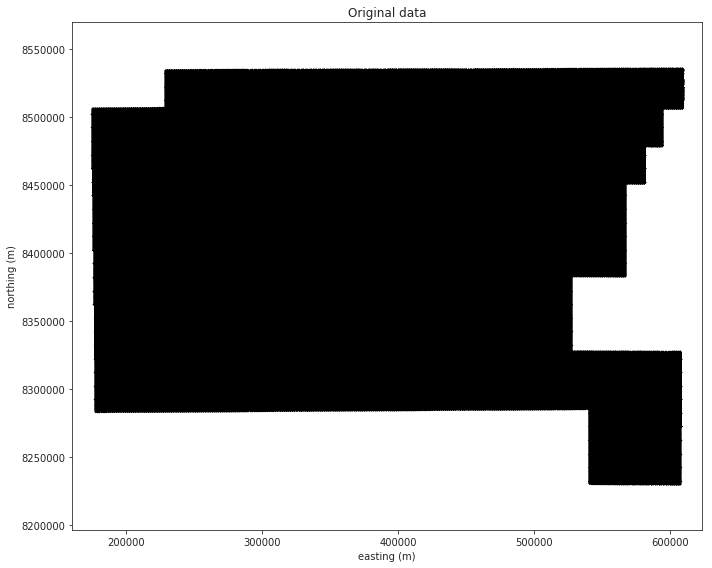

In [3]:
# Plot the bathymetry data locations as black dots
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_title('Original data')
ax.plot(data[:,0], data[:,1], 'k.', markersize=0.1)
ax.set_aspect('equal', 'datalim')
plt.xlabel('easting (m)')
plt.ylabel('northing (m)')
plt.tight_layout()

In [ ]:
%%time
spacing = 150 # meters

reducer_center = vd.BlockReduce(
    reduction=np.median, spacing=spacing, center_coordinates=True)

coordinates_center, mag = reducer_center.filter(
    coordinates=(data[:,0], data[:,1]), data=data[:,2])

In [ ]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_title('Location of decimated data using block centers')
# Plot the bathymetry data locations as black dots
ax.plot(*coordinates_center, 'k.', markersize=0.1)
ax.set_aspect('equal', 'datalim')
plt.xlabel('easting (m)')
plt.ylabel('northing (m)')
plt.tight_layout()

In [ ]:
data_reduction = (1 - mag.shape[0]/data.shape[0]) * 100
print('Data reduction: {:.2f}%'.format(data_reduction))

In [ ]:
filename = '../data/interim/MAGIGRF_DECIMATED_{0}x{0}m.npy'.format(spacing)
np.save(filename, np.core.records.fromarrays([*coordinates_center, mag],
                           names='x, y, data', formats='f8, f8, f8'))